In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from utils import load_classification_data

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_classification_data()

## Decision Tree

In [2]:
# model initialization
decision_tree = DecisionTreeClassifier()

In [3]:
# testing different hyperparameters
criterion = ['gini', 'entropy']
max_depth = [2, 4, 8, 16, 32]

# create dictionary for hyperparameters
parameters = dict(decision_tree_criterion=criterion,decision_tree_max_depth=max_depth)

#create the pipeline
pipe = Pipeline(steps=[('decision_tree', decision_tree)])

In [4]:
# grid search help to find the best parameters for decision tree
grid_search = GridSearchCV(pipe, parameters)

In [8]:
grid_search.fit(trainX, trainY)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 8, 16, 32]})

In [10]:
print('Best Criterion:', grid_search.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', grid_search.best_estimator_.get_params()['dec_tree__max_depth'])
print(grid_search.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 16

DecisionTreeClassifier(criterion='entropy', max_depth=16)


In [11]:
# adjust the best parameters
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [12]:
decision_tree.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [13]:
preds = decision_tree.predict(testX)

In [16]:
print(classification_report(testY, preds))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        99
         1.0       0.87      0.89      0.88       140

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239



In [25]:
confusion = confusion_matrix(testY, preds)

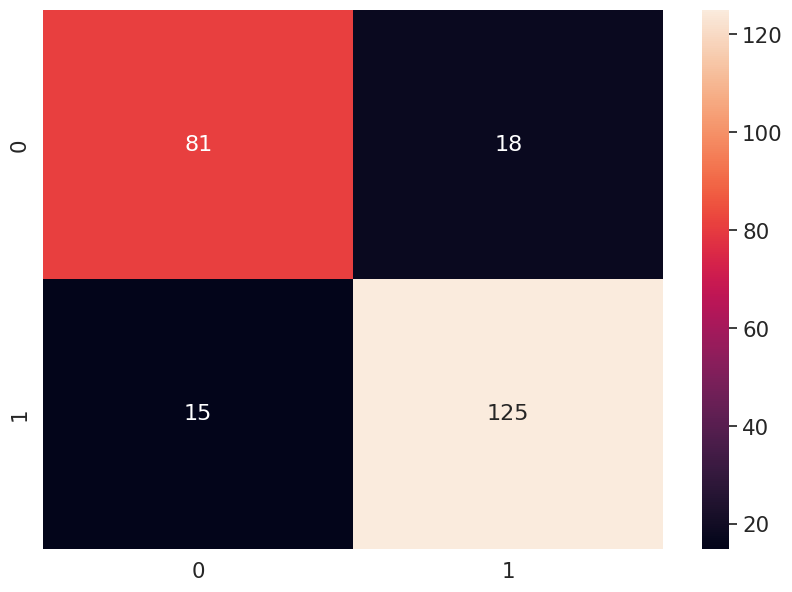

In [35]:
df = pd.DataFrame(confusion, range(2), range(2))
sn.set(font_scale=1.4)

plt.figure(figsize=(10,7))
sn.heatmap(df, annot=True, annot_kws={"size": 16}, fmt='g')
plt.savefig('tree-confusion', bbox_inches='tight', pad_inches=0)
plt.show()

## K-NN Classifier

In [10]:
# the best value was k=6

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(trainX, trainY)
preds = knn.predict(testX)

/home/umut/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [11]:
print(confusion_matrix(testY, preds))

[[ 69  30]
 [  4 136]]


In [12]:
print(classification_report(testY, preds))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80        99
         1.0       0.82      0.97      0.89       140

    accuracy                           0.86       239
   macro avg       0.88      0.83      0.85       239
weighted avg       0.87      0.86      0.85       239

